# MEDimage Tutorial − Initiation to the MEDimage class

@Author : [MEDomics consortium](https://github.com/medomics/)

@Email : medomics.info@gmail.com


**STATEMENT**:
This file is part of <https://github.com/MEDomics/MEDomicsLab/>,
a package providing PYTHON programming tools for radiomics analysis.
--> Copyright (C) MEDomicsLab consortium.

This package is free software: you can redistribute it and/or modify
it under the terms of the GNU General Public License as published by
the Free Software Foundation, either version 3 of the License, or
(at your option) any later version.

This package is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
GNU General Public License for more details.

You should have received a copy of the GNU General Public License
along with this package.  If not, see <http://www.gnu.org/licenses/>.

## Introduction

We recommed you run the [DataManager-Tutorial](https://colab.research.google.com/github/MahdiAll99/MEDimage/blob/dev/notebooks/tutorial/DataManager-Tutorial.ipynb) before going through this one.

This notebook is a tutorial for the ``MEDimag`` class to give a detailed introduction & explanation on how the Python class is created, used and saved. The ``MEDimage`` class is the main object used in the *MEDimage* package either when it comes to processing, features extraction or any other type of other image analysis. It contains many attributes, child classes and many methods that holds information about the imaging data we're using, the processing and computation parameters etc. This makes the *MEDimage* package an excellent tool for radiomics studies and the ``MEDimage`` class a main tool to the use of this package. 

In a nutshell, This tutorial will help you learn everything you need about the ``MEDimage`` class.


The *MEDimage* class and package are a Python implementation of the [IBSI](theibsi.github.io/) radiomics study scheme flowchart below:

<img src="images/RadiomicsFlowchart.jpg" width=400 height=400 />

So using the *MEDimage* package and class, we get the following flowchart

<img src="images/MEDimageFlowchart.png" width=600 height=400 />


Imports

In [1]:
import os
import sys

MODULE_DIR = os.path.dirname(os.path.abspath('../MEDimage/'))
sys.path.append(os.path.dirname(MODULE_DIR))

import MEDimage

## MEDimage initialization

Initializing a *MEDimage* class is easy, as you saw in the class diagram above, the *MEDimage* class can be created from raw data (DICOM or NIfTI) using the *DataManager* class. On the other hand *DataManager* can be initialized using only the path to the raw data folder and in its turn will process and convert this data to a *MEDimage* class and can also save it as a [pickle object](https://docs.python.org/3/library/pickle.html) (*npy* format). For DICOM data, the *MEDimage* class is created using information and data from [DICOM data element](https://www.dicomlibrary.com/dicom/dicom-tags/). Whereas, for NIfTI files, *MEDimage* class are created using data in NIfTI files and information in [NIfTI header](https://brainder.org/2012/09/23/the-nifti-file-format/). Additionally, you can use the *DataManager* class as well to load an already-saved *MEDimage* instance. In this tuto we will demonstrate both approaches (DICOM & NIfTI), so we we will need DICOM and NIfTI data (can be found in the folder *data*). The following figure shows the folder structure:

<img src="images/MEDimageFolderStructure.png" width=600 height=400 />

Note that the *data* folder contains data for the same scan: *Glioma-TCGA-02-003*. *DICOM* folder contains multiple dcm files (slices of the imaging volume and files for the RTSTRCUT (Mask data)). The *NIfTI* folder contains files of the imaging and mask data for the same scan as well. The NifTI filenames should respect the following naming convention:
   - Imaging volume: **PatientID__ImagingScanName(tumorAuto).ImagingModality.nii.gz**
   - ROI mask: **PatientID__ImagingScanName(tumor).ROI.nii.gz**

### DataManager initialization

As explained in the [DataManager-Tutorial]() The ``DataManager`` class is capable of creating ``MEDimage`` objects from raw data using only paths to the data folder(s) and it will be used in this tutorial to process our data and create a ``MEDimage`` class object for our scan.

#### NIfTI initialization

We will start by initializing the class using a path to NIfTI data.

In [2]:
from pathlib import Path

path_nifti_data = Path(os.getcwd()) / "data" / "NIfTI"
dm = MEDimage.wrangling.DataManager(path_to_niftis=path_nifti_data)

We have now initialized the *DataManager* and we can call ``process_all_niftis`` to process our data. This method returns a list of instances. We only have one scan so it's a one-element list.

Some information about our scan:
 - **ID**: Glioma-TCGA-02-003
 - **Imaging scan name**: T1
 - **Modality**: MRscan
 - **Regions of interest**:
     - Number of regions: 6
     - Names of ROIs: ED, ET, NET, ED_M, ET_M and NET_M

In [3]:
MEDinstance = dm.process_all_niftis()[0] # one-element list


--> Scanning all folders in initial directory


100%|██████████| 4/4 [00:00<00:00, 104206.31it/s]


DONE
--> Reading all NIfTI objects (imaging volumes & masks) to create MEDimage classes


100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

DONE


We now have a *MEDimage* class instance/object in memory.

**Extra**: To summarize the *DataManager* processing job, you can call the *summarize* class method that will print a table of the processed scans organized by study, institution, scan type and roi type

In [4]:
dm.summarize()

| study   | institution   | scan_type   | roi_type   |   count |
|:--------|:--------------|:------------|:-----------|--------:|
| Glioma  |               |             |            |       1 |
| Glioma  | TCGA          |             |            |       1 |
| Glioma  | TCGA          | T1          |            |       1 |


#### DICOM initialization

We will initialize the *DataManager* the same way we did for NIfTI for the same scan but using DICOM data this time.

In [5]:
from pathlib import Path

path_dicom_data = Path(os.getcwd()) / "data" / "DICOM"
dm = MEDimage.wrangling.DataManager(path_to_dicoms=path_dicom_data)

We have now initialized the *DataManager* and we can call *process_all_dicoms* to process our data. This method returns a list of instances. Again, we only have one scan so it's a one-element list.

In [6]:
MEDinstance = dm.process_all_dicoms()[0] # one-element list

2022-08-08 16:18:12,090	INFO services.py:1090 -- View the Ray dashboard at http://127.0.0.1:8265


--> Reading all DICOM objects to create MEDimage classes

--> Scanning all folders in initial directory...

100%|██████████| 157/157 [00:00<00:00, 1149.25it/s]


DONE
--> Associating all RT objects to imaging volumes


100%|██████████| 2/2 [00:00<00:00, 74898.29it/s]

DONE



100%|██████████| 1/1 [00:00<00:00, 6204.59it/s]

DONE


We now have a *MEDimage* class instance/object in memory.

By now it should be clear how to initialize a *MEDimage* class from raw data. Let's now explore the instance we created.

## MEDimage class exploration

To further understand the *MEDimage* class, we will take a look at the class diagram below that describes the structure of the class, attributes, methods and the relationships with other objects.

<img src="images/MEDimageClassDiagram.png"/>

TODO: For more details about the class please refer to the [*MEDimage* documentation]()

###  - Patient ID
A special identification string for each patient/scan.

In [7]:
MEDinstance.patientID

'Glioma-TCGA-02-0003'

###  - Type
Scan type, usually: *MRscan*, *CTscan*, *PETscan*...

In [8]:
MEDinstance.type

'MRscan'

###  - Format
The format used to initialize the current *MEDimage* class, either DICOM or NIfTI

In [9]:
MEDinstance.format

'dicom'

As we can see the format is not the same for both instances since we used different formats for initialization.

###  - scan (inner class)
A *MEDimage* inner class that holds all the imaging data (volume and ROI) and other important information. It has the following attributes:
- *orientation*: Imaging data anatomical plane (sagittal plane, coronal plane or axial plane)

In [10]:
MEDinstance.scan.orientation

'Axial'

- *patient_position*: Position of the patient relative to the imaging equipment space (HFS, HFP...)

In [11]:
MEDinstance.scan.patient_position

'HFS'

- **volume** : A *scan* inner class that holds imaging volume data and other information. It has the following attributes:
    - *data*: Array of the imaging data

In [12]:
# volume data
MEDinstance.scan.volume.data.shape

(240, 240, 155)

And we can visualize this data using the *display()* method

<Figure size 432x288 with 0 Axes>

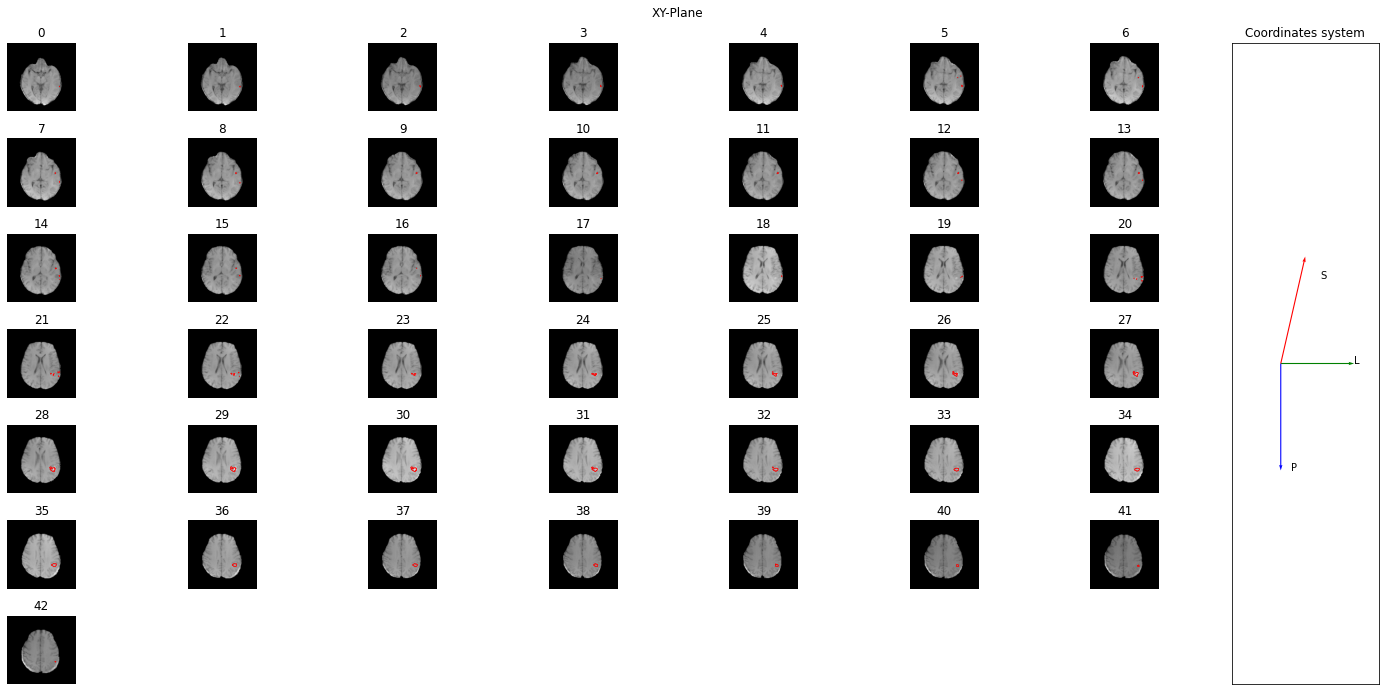

In [13]:
MEDinstance.scan.display()

You can plot only one slice using the same method *display()* by specifying the index of the slice

<Figure size 432x288 with 0 Axes>

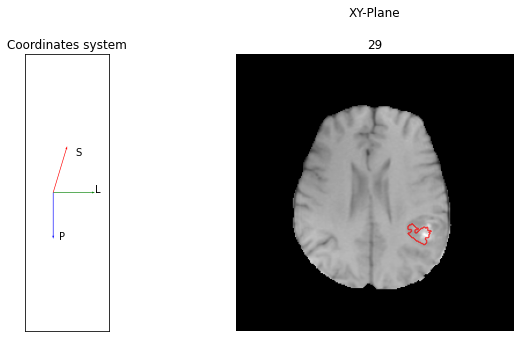

In [30]:
MEDinstance.scan.display(29)

- **spatialRef**: same functionality of [MATLAB imref3d class](https://www.mathworks.com/help/images/ref/imref3d.html).

Span of image in the x-dimension in the world coordinate system

In [15]:
MEDinstance.scan.volume.spatialRef.ImageExtentInWorldX

240.0

Span of image in the y-dimension in the world coordinate system

In [16]:
MEDinstance.scan.volume.spatialRef.ImageExtentInWorldY

240.0

Span of image in the z-dimension in the world coordinate system

In [17]:
MEDinstance.scan.volume.spatialRef.ImageExtentInWorldZ

155.0

- **ROI** : A *scan* inner class that holds mask data and other information. It has the following attributes:
    - *indexes*: Dict of the ROI indexes for each ROI name.
    - *roi_names*: Dict of the ROI names for the imaging data.
    - *nameSet* (Not crucial for features extraction): Dict of the User-defined name for Structure Set for each ROI name.
    - nameSetInfo* (Not crucial for features extraction): Dict of the names of the structure sets that define the areas of significance. Either 'StructureSetName', 'StructureSetDescription', 'SeriesDescription' or 'SeriesInstanceUID'.

*indexes*: the indexes are just integers that point to the region of interest. For each ROI name we have a list of indexes.

In [18]:
MEDinstance.scan.ROI.indexes

{'0': (array([5565983, 5565984, 5565985, ..., 6830775, 6830930, 6831086]),),
 '1': (array([5195371, 5195526, 5232100, ..., 6906568, 6906721, 6906722]),),
 '2': (array([5528627, 5528628, 5528629, ..., 6831540, 6831541, 6869197]),),
 '3': (array([5566137, 5566140, 5603182, ..., 6830775, 6830930, 6831086]),),
 '4': (array([5195371, 5195526, 5232100, ..., 6906568, 6906721, 6906722]),),
 '5': (array([5453918, 5454073, 5454228, ..., 6831540, 6831541, 6869197]),)}

As mentioned in the introduction, the ROI names are : *ED*, *ET*, *NET*, *ED_M*, *ET_M* and *NET_M* we must have the same names in our class instance, let's check...

In [19]:
MEDinstance.scan.ROI.roi_names

{'0': 'ET', '1': 'NET', '2': 'ED', '3': 'ET_M', '4': 'NET_M', '5': 'ED_M'}

Finally, the two final attributes are *nameSet* and *nameSetInfo* are not used in any part of the processing nor extacting and are here for description purposes.

In [20]:
MEDinstance.scan.ROI.nameSet

{'0': '2.16.840.1.114362.1.11785856.21988995044.507357457.923.7973',
 '1': '2.16.840.1.114362.1.11785856.21988995044.507357457.923.7973',
 '2': '2.16.840.1.114362.1.11785856.21988995044.507357457.923.7973',
 '3': '2.16.840.1.114362.1.11785856.21988995044.507357458.463.8120',
 '4': '2.16.840.1.114362.1.11785856.21988995044.507357458.463.8120',
 '5': '2.16.840.1.114362.1.11785856.21988995044.507357458.463.8120'}

In [21]:
MEDinstance.scan.ROI.nameSetInfo

{'0': 'SeriesInstanceUID',
 '1': 'SeriesInstanceUID',
 '2': 'SeriesInstanceUID',
 '3': 'SeriesInstanceUID',
 '4': 'SeriesInstanceUID',
 '5': 'SeriesInstanceUID'}

You can update every class attribute value using the right class methods for that (check the class diagram above or the [*MEDimage* documentation]())